In [1]:
import sys
sys.path.append("../")

import torch
import torchvision.utils
import torch.nn.functional as F

import cv2
import numpy as np
import matplotlib.pyplot as plt

from util import cv_image2tensor
import nnArch.siamese as siamese

In [2]:
class config():
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    input_size = (60,160)
    MODEL_PATH = '../pengujian/bst-new-cuhk02/bst-new-cuhk02.pth'

In [3]:
def imshow(img, text=None, should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
model = siamese.BstCnn()
model.load_state_dict(torch.load(config.MODEL_PATH, map_location=config.device))
model.to(config.device)
model.eval()

BstCnn(
  (conv5x5_1): Sequential(
    (0): ReflectionPad2d((2, 2, 2, 2))
    (1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3x3_1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3x3_2): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(35, 16, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv1x1_2): Sequential(
    (0): Conv2d(35, 16, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv1x1_3): Sequential(
    (0): Conv2d(32, 16

In [12]:
img1 = cv2.imread('../crop/3d4e4e961ad04d2b9c730fd8b27a348a.jpg')
img2 = cv2.imread('../crop/3d1ddb79f9554f2495439b9df1856bf7.jpg')

# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1, config.input_size)
img2 = cv2.resize(img2, config.input_size)

tensor1 = cv_image2tensor(img1).to(config.device)
tensor2 = cv_image2tensor(img2).to(config.device)

Dissimilarity 0.845910257


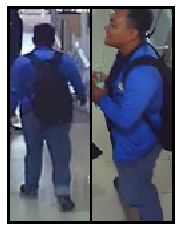

In [13]:
with torch.no_grad():
    concatenated = torch.cat((tensor1, tensor2),0)

    tensor1 = tensor1.to(config.device)
    tensor2 = tensor2.to(config.device)

    out1, out2 = model(tensor1, tensor2)
    euclidean_distance = F.pairwise_distance(out1, out2)
    d = float(euclidean_distance.item())
    d = abs((1 / (1 + d)) - 1)
    
    print('Dissimilarity {:.9f}'.format(d))
    imshow(torchvision.utils.make_grid(concatenated))